**Exercise 7.11**. Simulate an MA(1) series with $\theta = −0.6$ and $n = 48$.

**(a)** Find the maximum likelihood estimate of $\theta$.

**(b)** If your software permits, repeat part (a) many times with a new simulated series using the same parameters and same sample size.

**(c)** Form the sampling distribution of the maximum likelihood estimates of $\theta$.

**(d)** Are the estimates (approximately) unbiased?

**(e)** Calculate the variance of your sampling distribution and compare it with the large-sample result in Equation (7.4.11) on page 161.

**Solution**.

In [1]:
B = 10000
estimates = rep(NA, B)

set.seed(0)
for (i in 1:B) {
    estimates[i] = -arima(arima.sim(model=list(ma=0.6), n=48), order=c(0,0,1), method='ML')$coef[[1]]
}

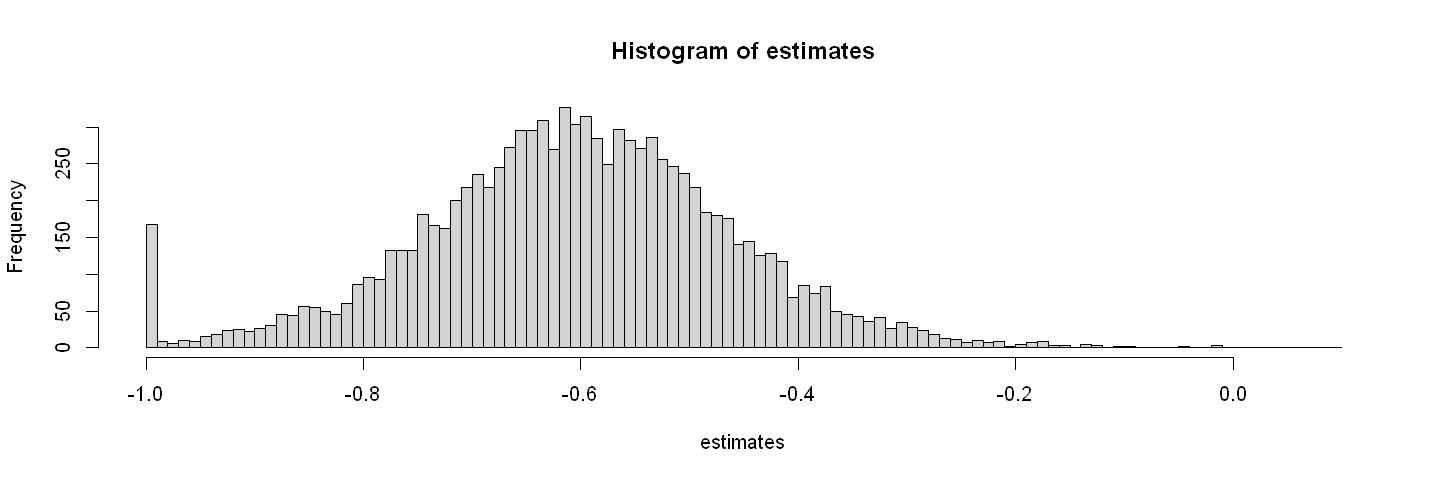

In [2]:
options(repr.plot.width=12, repr.plot.height=4)

hist(estimates, breaks=100)

In [3]:
print(c('Bootstrap estimate mean: ', round(mean(estimates), 3)), quote=F)
print(c('Bootstrap estimate SE:   ', round(sqrt(var(estimates)), 3)), quote=F)
print(c('5% percentile:           ', round(quantile(estimates, 0.05)[[1]], 3)), quote=F)
print(c('95% percentile:          ', round(quantile(estimates, 0.95)[[1]], 3)), quote=F)

[1] Bootstrap estimate mean:  -0.605                   
[1] Bootstrap estimate SE:    0.145                    
[1] 5% percentile:            -0.851                   
[1] 95% percentile:           -0.375                   


The large sample result from Equation (7.4.11) is 

$$ \text{Var}[\hat{\theta}] \approx \frac{1 - \theta^2}{n} $$

which is a variance of 0.0133, or a standard error of 0.115.  The bootstrap process produces a sampling distribution that seems to have a bit higher standard error, but have mean results that are still within the original standard error -- results seem unbiased.

**Exercise 7.12**.  Repeat Exercise 7.11 using a sample size of n = 120.

**Solution**.

In [4]:
B = 10000
estimates = rep(NA, B)

set.seed(0)
for (i in 1:B) {
    estimates[i] = -arima(arima.sim(model=list(ma=0.6), n=120), order=c(0,0,1), method='ML')$coef[[1]]
}

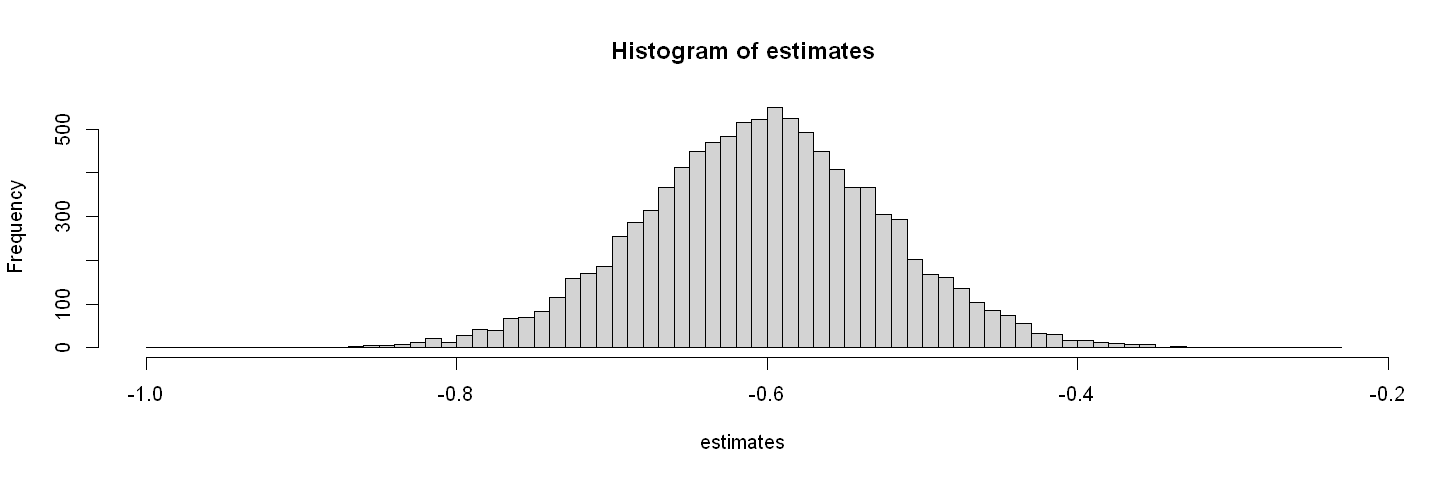

In [5]:
options(repr.plot.width=12, repr.plot.height=4)

hist(estimates, breaks=100)

In [6]:
print(c('Bootstrap estimate mean: ', round(mean(estimates), 3)), quote=F)
print(c('Bootstrap estimate SE:   ', round(sqrt(var(estimates)), 3)), quote=F)
print(c('5% percentile:           ', round(quantile(estimates, 0.05)[[1]], 3)), quote=F)
print(c('95% percentile:          ', round(quantile(estimates, 0.95)[[1]], 3)), quote=F)

[1] Bootstrap estimate mean:  -0.603                   
[1] Bootstrap estimate SE:    0.079                    
[1] 5% percentile:            -0.733                   
[1] 95% percentile:           -0.472                   


The large sample result from Equation (7.4.11) is 

$$ \text{Var}[\hat{\theta}] \approx \frac{1 - \theta^2}{n} $$

which is a variance of 0.00533, or a standard error of 0.073.  The bootstrap process produces a sampling distribution that seems to have a variance in line with this value, and an unbiased result.

**Exercise 7.13**. Simulate an AR(1) series with $\phi = 0.8$ and $n = 48$.

**(a)** Find the method-of-moments estimate of φ.

**(b)** Find the conditional least squares estimate of φ and compare it with part (a).

**(c)** Find the maximum likelihood estimate of φ and compare it with parts (a) and (b).

**(d)** Repeat parts (a), (b), and (c) with a new simulated series using the same parameters and same sample size. Compare your results with your results from the first simulation.

**Solution**.

In [7]:
estimate.ar1.mom <- function(x) {
    acf(x, lag.max=1, plot=F)$acf[2]
}

In [8]:
set.seed(0)
Y = arima.sim(model=list(ar=0.8), n=48)

**(a)**

In [9]:
print(c('Method of moments estimate:         ', round(estimate.ar1.mom(Y), 5)), quote=F)

[1] Method of moments estimate:          0.76759                             


**(b)**

In [10]:
print(c('Conditional least squares estimate: ', round(arima(Y, order=c(1,0,0), method='CSS')$coef[[1]], 5)), quote=F)

[1] Conditional least squares estimate:  0.78563                             


This is a better estimate than the one obtained in part (a).

**(c)**

In [11]:
print(c('Maximum likelihood estimate:        ', round(arima(Y, order=c(1,0,0), method='ML')$coef[[1]], 5)), quote=F)

[1] Maximum likelihood estimate:         0.77103                             


This is a better estimate than the one obtained in part (a), but worse than the CSS estimate.

**(d)**

In [12]:
set.seed(1)
Y = arima.sim(model=list(ar=0.8), n=48)
print(c('Method of moments estimate:         ', round(estimate.ar1.mom(Y), 5)), quote=F)
print(c('Conditional least squares estimate: ', round(arima(Y, order=c(1,0,0), method='CSS')$coef[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate:        ', round(arima(Y, order=c(1,0,0), method='ML')$coef[[1]], 5)), quote=F)

[1] Method of moments estimate:          0.57289                             
[1] Conditional least squares estimate:  0.58319                             
[1] Maximum likelihood estimate:         0.624                               


For this random seed, all estimates seem poor -- though the MLE is better than the others.

**Exercise 7.14**.  Simulate an AR(1) series with $\phi = −0.5$ and $n = 60$.

**(a)** Find the method-of-moments estimate of $\phi$.

**(b)** Find the conditional least squares estimate of $\phi$ and compare it with part (a).

**(c)** Find the maximum likelihood estimate of $\phi$ and compare it with parts (a) and (b).

**(d)** Repeat parts (a), (b), and (c) with a new simulated series using the same parameters and same sample size. Compare your results with your results from the first simulation.

**Solution**.

In [13]:
set.seed(0)
Y = arima.sim(model=list(ar=-0.5), n=60)

**(a)**

In [14]:
print(c('Method of moments estimate:         ', round(estimate.ar1.mom(Y), 5)), quote=F)

[1] Method of moments estimate:          -0.46171                            


**(b)**

In [15]:
print(c('Conditional least squares estimate: ', round(arima(Y, order=c(1,0,0), method='CSS')$coef[[1]], 5)), quote=F)

[1] Conditional least squares estimate:  -0.46261                            


This result is almost the same as in (a).

**(c)**

In [16]:
print(c('Maximum likelihood estimate:        ', round(arima(Y, order=c(1,0,0), method='ML')$coef[[1]], 5)), quote=F)

[1] Maximum likelihood estimate:         -0.456                              


This result seems to be almost the same, but worse, than the other estimates obtained so far.

**(d)**

In [17]:
set.seed(1)
Y = arima.sim(model=list(ar=-0.5), n=60)
print(c('Method of moments estimate:         ', round(estimate.ar1.mom(Y), 5)), quote=F)
print(c('Conditional least squares estimate: ', round(arima(Y, order=c(1,0,0), method='CSS')$coef[[1]], 5)), quote=F)
print(c('Maximum likelihood estimate:        ', round(arima(Y, order=c(1,0,0), method='ML')$coef[[1]], 5)), quote=F)

[1] Method of moments estimate:          -0.48559                            
[1] Conditional least squares estimate:  -0.53617                            
[1] Maximum likelihood estimate:         -0.54812                            


Once again the method of moments estimate appears to be better, in comparison with the others.

**Exercise 7.15**.  Simulate an AR(1) series with $\phi = 0.7$ and $n = 100$.

**(a)** Find the maximum likelihood estimate of $\phi$.

**(b)** If your software permits, repeat part (a) many times with a new simulated series using the same parameters and same sample size.

**(c)** Form the sampling distribution of the maximum likelihood estimates of $\phi$.

**(d)** Are the estimates (approximately) unbiased?

**(e)** Calculate the variance of your sampling distribution and compare it with the large-sample result in Equation (7.4.9) on page 161.

**Solution**.

In [18]:
B = 10000
estimates = rep(NA, B)

set.seed(0)
for (i in 1:B) {
    estimates[i] = arima(arima.sim(model=list(ar=0.7), n=100), order=c(1,0,0), method='ML')$coef[[1]]
}

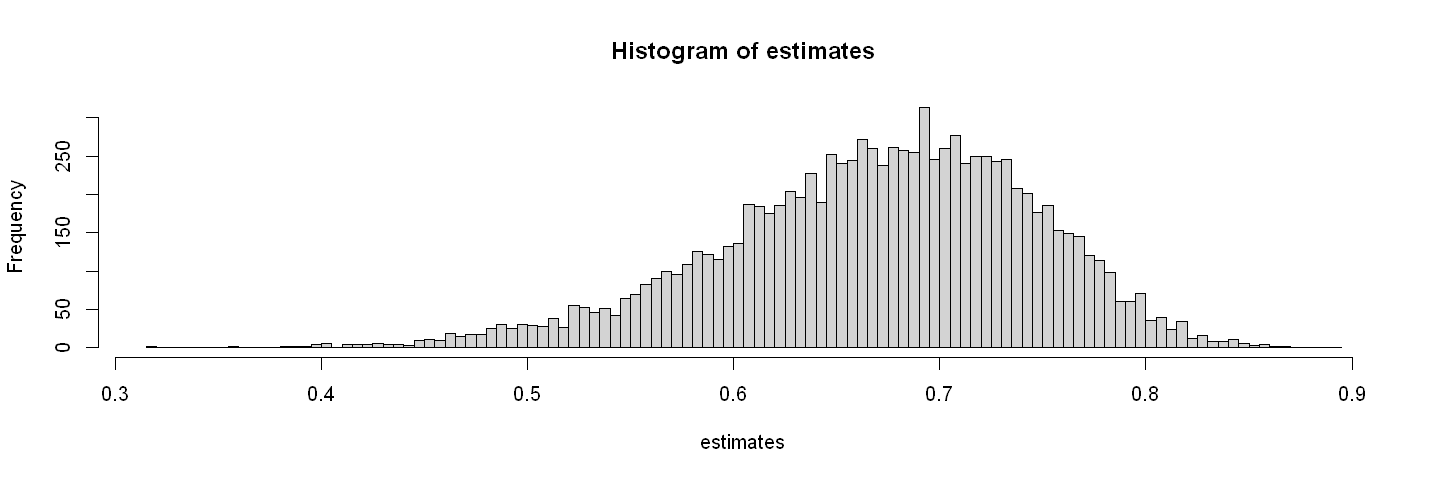

In [19]:
options(repr.plot.width=12, repr.plot.height=4)

hist(estimates, breaks=100)

In [20]:
print(c('Bootstrap estimate mean: ', round(mean(estimates), 3)), quote=F)
print(c('Bootstrap estimate SE:   ', round(sqrt(var(estimates)), 3)), quote=F)
print(c('5% percentile:           ', round(quantile(estimates, 0.05)[[1]], 3)), quote=F)
print(c('95% percentile:          ', round(quantile(estimates, 0.95)[[1]], 3)), quote=F)

[1] Bootstrap estimate mean:  0.669                    
[1] Bootstrap estimate SE:    0.076                    
[1] 5% percentile:            0.53                     
[1] 95% percentile:           0.78                     


The large sample result from Equation (7.4.9) is 

$$ \text{Var}[\hat{\theta}] \approx \frac{1 - \phi^2}{n} $$

which is a variance of 0.0051, or a standard error of 0.0714.  The bootstrap process produces a sampling distribution that seems to have a variance in line with this value, and an unbiased result.